In [246]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

conn = sqlite3.connect('Spain_db') 
c = conn.cursor()

In [247]:
tables = pd.read_sql("""SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table'""", conn)
tables

,name
0,weather_aqi_provinces
1,most_polluted_cities
2,madrid_neighborhood_aqi
3,life_expectancy
4,coches
5,population_density
6,trees
7,old_cars
8,empleo
9,desempleo_2021


In [248]:
df1 = pd.read_sql('''select * from weather_aqi_provinces''', conn)
df1.sample()

,province,weather,temp_c,humidity_%,wind_km/h,pressure_mbar,AQI,PM2_5,PM10,O3,NO2,SO2,CO,PM25_was_unknown,date,comunidades
244,Cáceres,Broken clouds,14,90,14.5,1013,0.0,4.1,Unknown,Unknown,Unknown,Unknown,0.1,No,2022-11-15 21:00:00,Extremadura


In [4]:
# outliers en AQI:
def find_anoms(data):
    std_var = np.std(data)
    mean = np.mean(data)
    lista = []
    for i, num in enumerate(data):
        if num < mean - std_var*3:
            lista.append([i, num])
        if num > mean + std_var * 3:
            lista.append([i, num])
    return lista

anom_list = []
for a in df1.province.unique():
    df2 = df1[['province', 'AQI']][df1[['province', 'AQI']].province==a]
    anoms = find_anoms(df2['AQI'])
    anom_list.append([a, anoms])
for el in anom_list:
    if len(el[1]) >0:
        print(el)

['Almería', [[18, 77.0]]]
['Asturias', [[1, 88.0]]]
['Badajoz', [[0, 57.0]]]
['Balears, Illes', [[3, 59.0]]]
['Ciudad Real', [[2, 59.0]]]
['Huelva', [[6, 84.0]]]
['Huesca', [[16, 31.0]]]
['Madrid', [[2, 76.0]]]
['Salamanca', [[0, 33.0]]]
['Segovia', [[0, 57.0]]]
['Sevilla', [[19, 102.0]]]
['Teruel', [[0, 57.0]]]
['Toledo', [[0, 45.0]]]
['Valencia/València', [[2, 68.0]]]
['Valladolid', [[0, 59.0]]]


<AxesSubplot:xlabel='province', ylabel='AQI'>

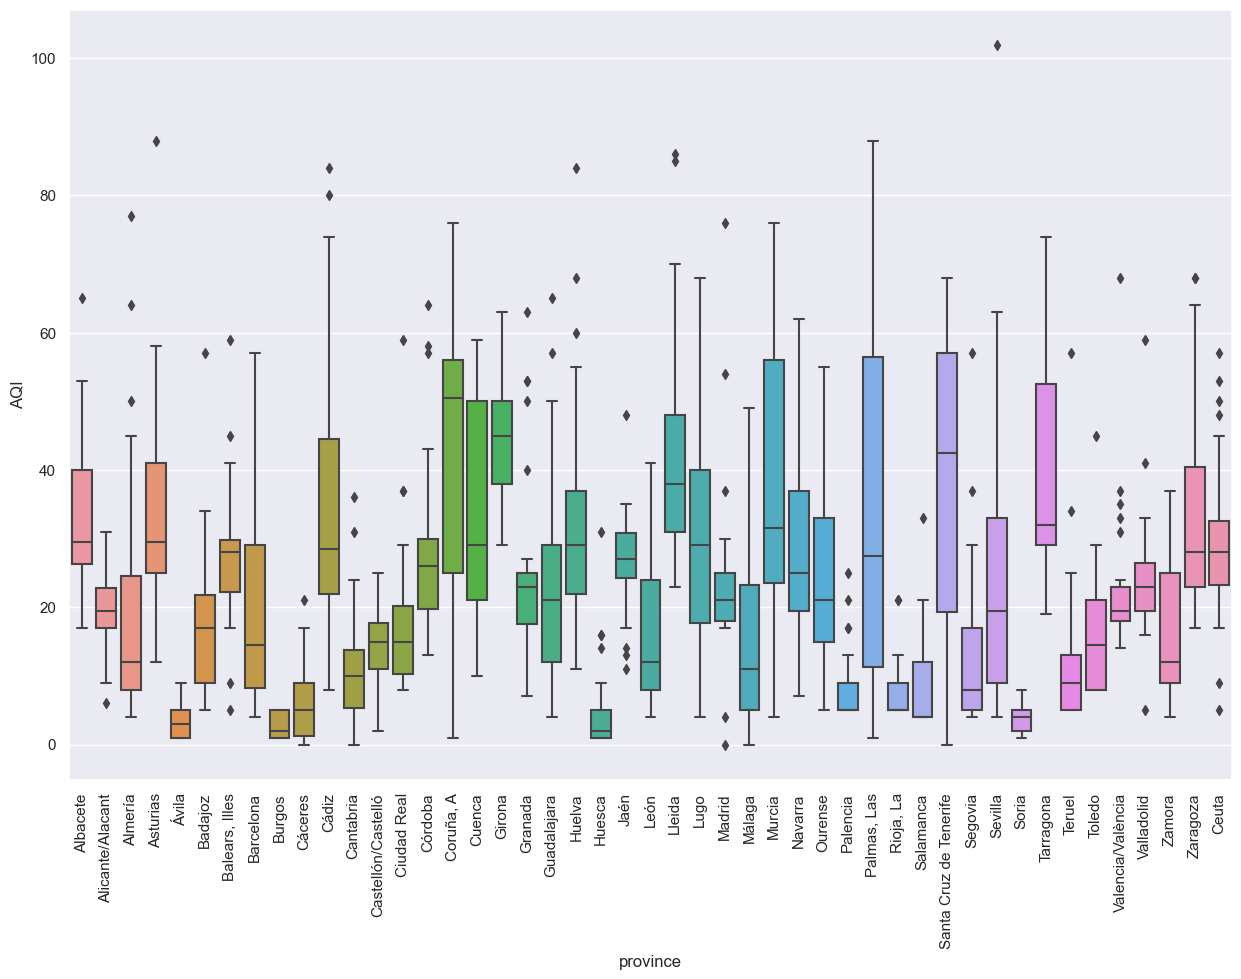

In [17]:
# visualizar outliers
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='province', y='AQI', data=df1)

In [128]:
# Veo muchos outliers. Uso medianas en vez de medias para aggregar los datos de AQI por provincia.

In [347]:
df1.shape

(1222, 16)

In [346]:
df1.O3.value_counts().reset_index()[:1]

,index,O3
0,Unknown,705


In [ ]:
# 705 de 1222 valores de O3(ozono) son desconocidos. 

In [130]:
df1.describe()

,temp_c,humidity_%,wind_km/h,pressure_mbar,AQI,PM2_5
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,13.717676,74.470540,17.016448,1015.419804,23.193126,5.663175
std,4.527430,15.504681,10.356258,5.644218,17.813034,4.958514
min,0.000000,26.000000,0.000000,999.000000,0.000000,0.000000
25%,11.000000,64.000000,9.125000,1011.000000,9.000000,2.100000
50%,13.000000,76.000000,14.800000,1016.000000,21.000000,4.100000
75%,17.000000,87.000000,24.100000,1020.000000,31.000000,7.000000
max,29.000000,100.000000,53.700000,1033.000000,102.000000,36.000000


In [179]:
df1.corr()

,temp_c,humidity_%,wind_km/h,pressure_mbar,AQI,PM2_5
temp_c,1.000000,-0.476675,0.004008,0.109798,0.284569,0.224497
humidity_%,-0.476675,1.000000,-0.097859,-0.095276,-0.122575,-0.058381
wind_km/h,0.004008,-0.097859,1.000000,-0.205601,-0.205128,-0.244722
pressure_mbar,0.109798,-0.095276,-0.205601,1.000000,0.117244,0.111688
AQI,0.284569,-0.122575,-0.205128,0.117244,1.000000,0.928109
PM2_5,0.224497,-0.058381,-0.244722,0.111688,0.928109,1.000000


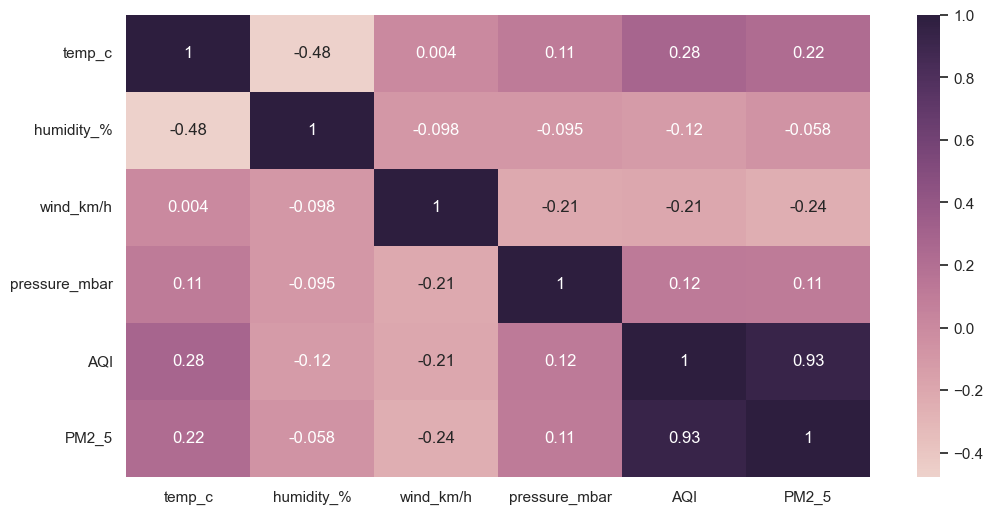

In [178]:
# visualizar la correlación entre AQI y tiempo
sns.heatmap(df1.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True));

In [245]:
# No veo correlacion entre AQI y los otros variables

In [249]:
df = pd.read_sql('''
select *
from Everything''', conn)

In [251]:
print(df.columns)

Index(['province', 'comunidad', 'latitude', 'longitude', 'altitud',
       'aqi_medians', 'life_exp', 'tasa_paro', 'population', 'habs_por_km2',
       'area_km2', 'trees_millions', 'tree_density', 'coches_por_100',
       'No_coches_electricos', 'ce_por_1000', 'com_population'],
      dtype='object')


In [252]:
df.columns = ['province', 'community', 'latitude', 'longitude', 'altitude',
       'aqi_medians', 'life_exp', 'unemployment_rate', 'population', 'pop_density_km2',
       'area_km2', 'trees_millions', 'tree_density', 'cars_100_people',
       'electric_cars_total', 'electric_cars_1000_people', 'com_population']

In [253]:
df.describe()

,latitude,longitude,altitude,aqi_medians,life_exp,unemployment_rate,population,pop_density_km2,area_km2,trees_millions,tree_density,cars_100_people,electric_cars_total,electric_cars_1000_people,com_population
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01
mean,39.748330,-3.852446,309.744681,20.234043,82.835532,12.845319,9.264671e+05,113.469617,134.583021,131.957447,12.977750,50.226170,835.000000,0.000205,3.534388e+06
std,3.202176,3.771377,324.619206,11.810483,1.169738,4.222226,1.227516e+06,162.609265,846.896841,87.673792,9.229307,3.883217,1136.638331,0.000145,2.884821e+06
min,28.099379,-16.247206,1.000000,2.000000,78.470000,7.320000,8.514400e+04,8.600000,3.375000,0.000000,0.000000,42.330000,7.000000,0.000079,8.514400e+04
25%,38.164925,-5.710165,16.000000,11.500000,82.180000,9.940000,3.235010e+05,25.600000,7.582500,75.500000,6.963910,47.890000,296.000000,0.000123,1.619240e+06
50%,40.408412,-3.804748,167.000000,21.000000,83.040000,10.920000,5.802290e+05,55.300000,10.561000,100.000000,10.299348,50.600000,326.000000,0.000137,2.409164e+06
75%,41.872570,-1.386847,637.000000,28.250000,83.585000,15.765000,1.023377e+06,129.800000,14.550000,227.500000,17.863771,52.760000,1065.000000,0.000218,7.089072e+06
max,43.462979,2.824119,997.000000,50.500000,84.740000,22.750000,6.578079e+06,819.500000,5817.000000,325.000000,48.062278,61.840000,5817.000000,0.000884,8.384408e+06


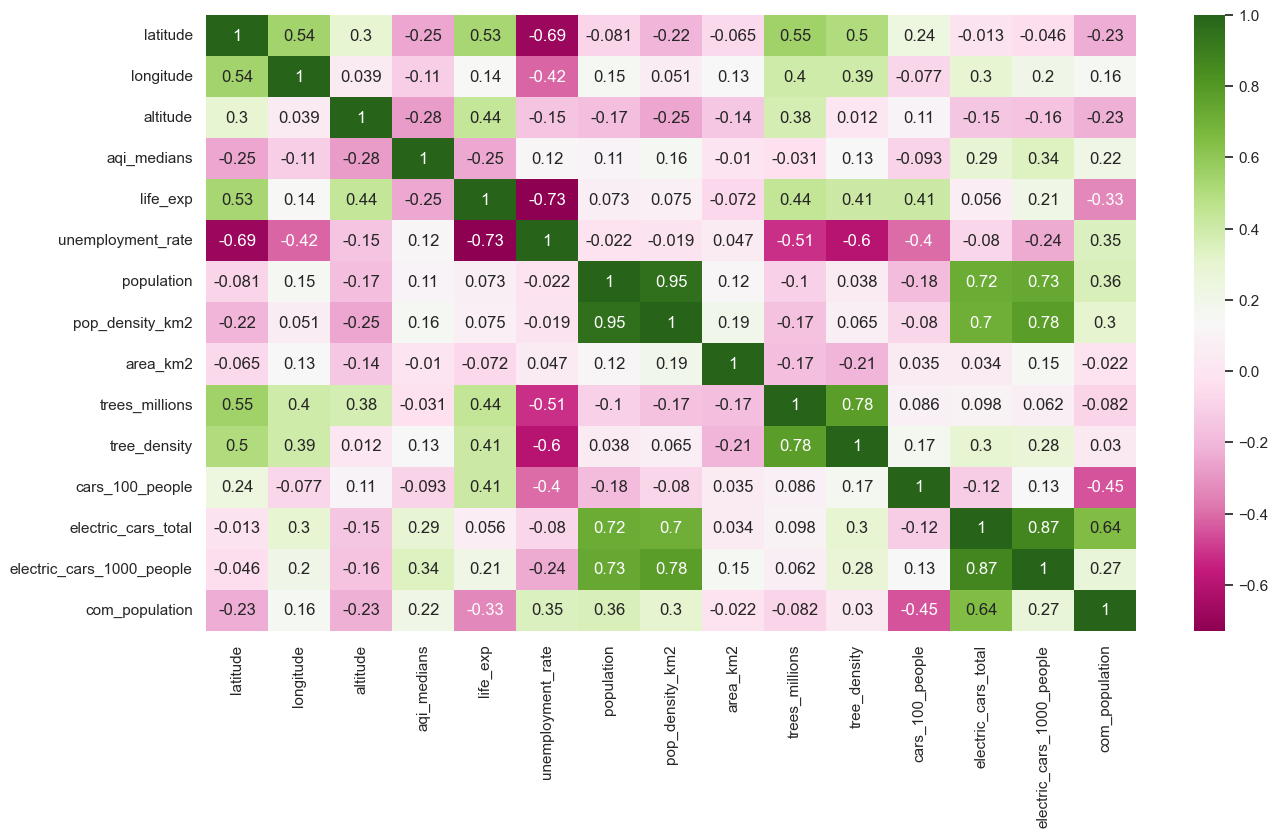

In [255]:
# visualizar correlaciones
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, cmap="PiYG");

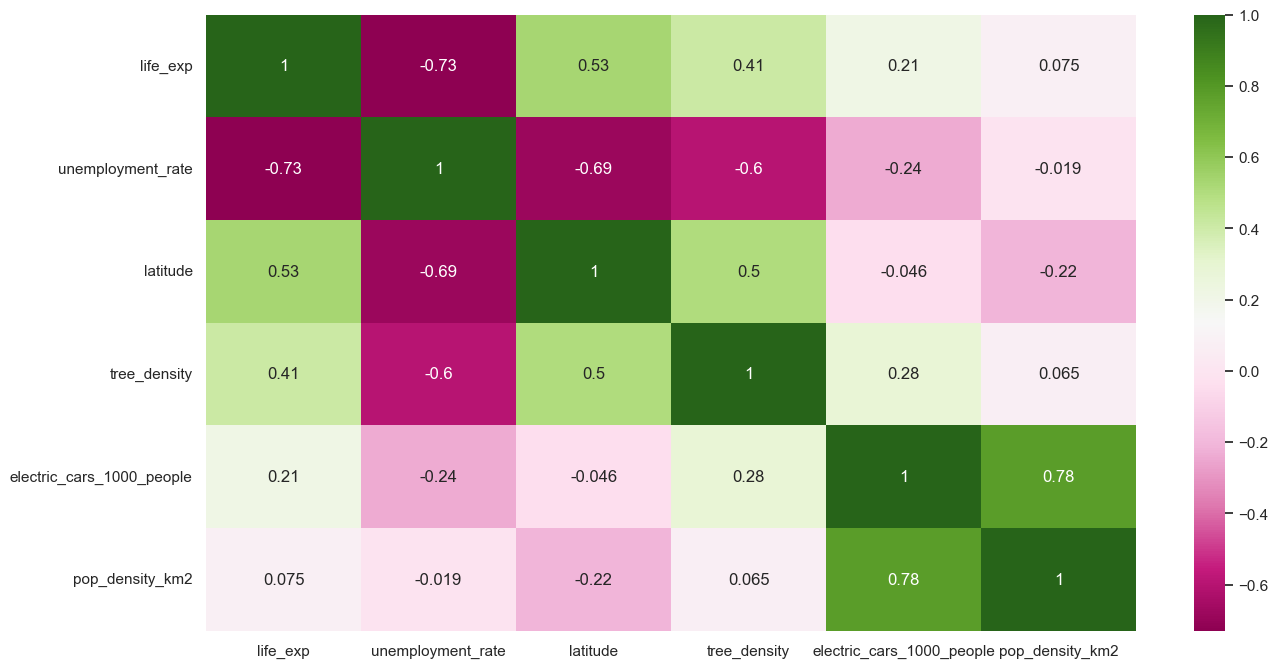

In [256]:
# visualizar correlaciones entre valores más correlacionados
sns.heatmap(df[['life_exp', 'unemployment_rate', 'latitude', 'tree_density', 'electric_cars_1000_people', 'pop_density_km2']].corr(), annot=True, cmap="PiYG");

In [154]:
# No veo correlacion entre contaminacion de aire(AQI) y ningun otro variable. 
# Hay correlacion entre densidad de poblacion y coches electricos
# Hay correlacion entre latitude y arboles, tasa de paro, esperanza de vida

In [348]:
com_pops = df.groupby('community').agg({'population':np.sum}).reset_index()
com_pops.columns = ['community', 'com_population']

In [ ]:
coches = pd.read_sql('''
select *
from coches''', conn)

In [47]:
# combine relevant info into one large dataframe to make calculations easier

# df = df.merge(com_pops, how='left')
# df = df.merge(life[['province', 'years']], how='left')
# df.rename(columns = {'years':'life_exp'}, inplace=True)
# avgs = df.groupby('province').agg({'life_exp':np.mean, 'AQI':np.mean})
# df = df.merge(coches[['province', 'coches_por_100']], how='left')

In [351]:
# cantidad de valors por provincia:
np.mean(df1.province.value_counts())

26.0

In [ ]:
# check if data is normal using histograms:

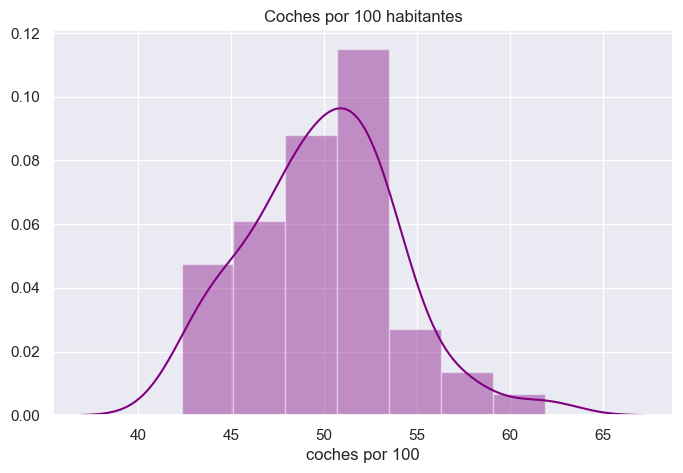

In [32]:
import warnings
warnings.simplefilter('ignore')
sns_plot = sns.distplot(coches.coches_por_100, color='purple').set(title='Coches por 100 habitantes', ylabel="", xlabel='coches por 100')
sns.set(rc={'figure.figsize':(8,5)})

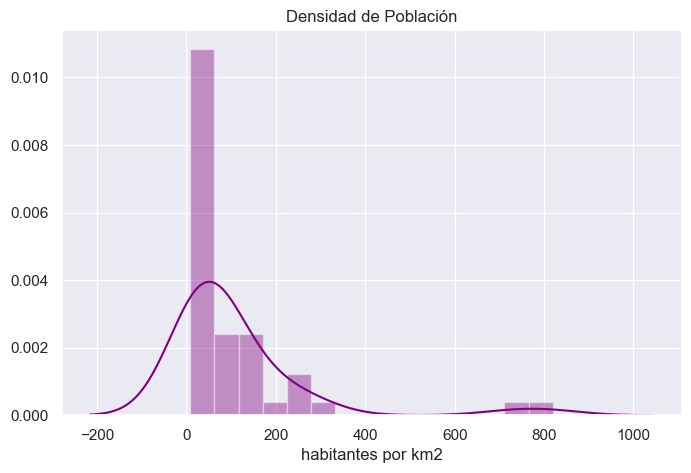

In [34]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(df.habs_por_km2, color='purple').set(title='Densidad de Población', ylabel="", xlabel='habitantes por km2');

In [ ]:
# https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm
# PM2.5:
# The short-term standard (24-hour or daily average) is 35 micrograms per cubic meter of air (µg/m3) 
# the long-term standard (annual average) is 12 µg/m3.

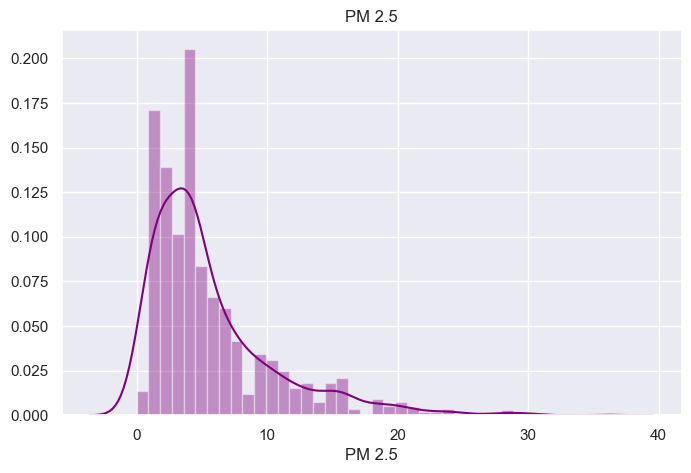

In [35]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(df1.PM2_5, color='purple').set(title='PM 2.5', ylabel="", xlabel='PM 2.5');

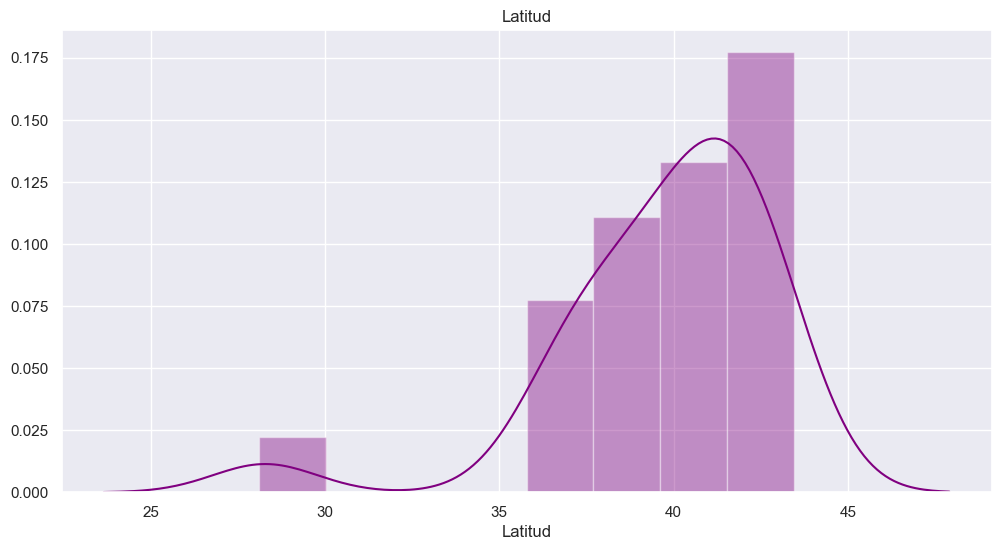

In [229]:
sns_plot = sns.distplot(df.latitude, color='purple').set(title='Latitud', ylabel="", xlabel='Latitud')
sns.set(rc={'figure.figsize':(8,5)})

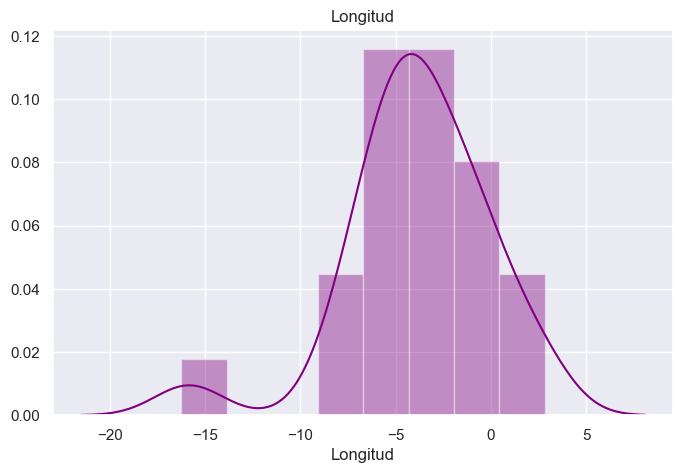

In [231]:
sns_plot = sns.distplot(df.longitude, color='purple').set(title='Longitud', ylabel="", xlabel='Longitud')
sns.set(rc={'figure.figsize':(8,5)})

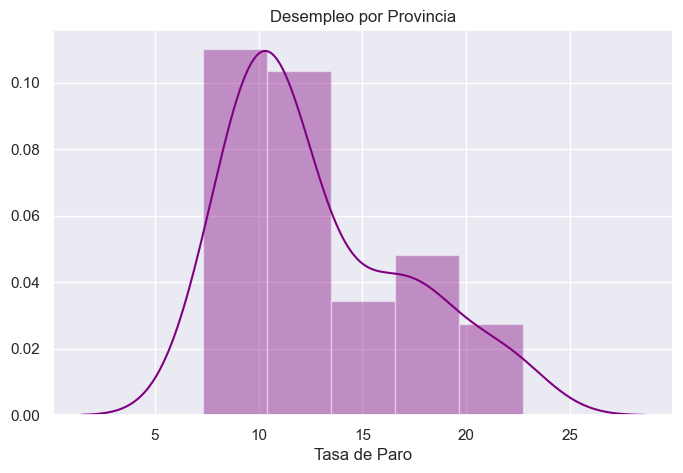

In [239]:
sns_plot = sns.distplot(df.tasa_paro, color='purple').set(title='Desempleo por Provincia', ylabel="", xlabel='Tasa de Paro')
sns.set(rc={'figure.figsize':(8,5)})

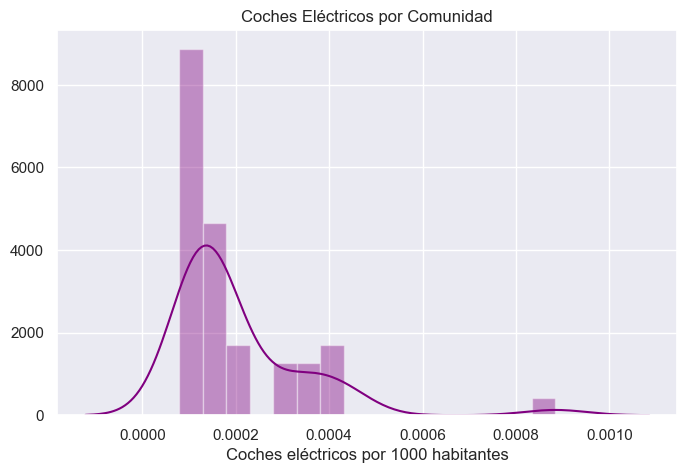

In [241]:
sns_plot = sns.distplot(df.ce_por_1000, color='purple').set(title='Coches Eléctricos por Comunidad', ylabel="", xlabel='Coches eléctricos por 1000 habitantes')
sns.set(rc={'figure.figsize':(8,5)})

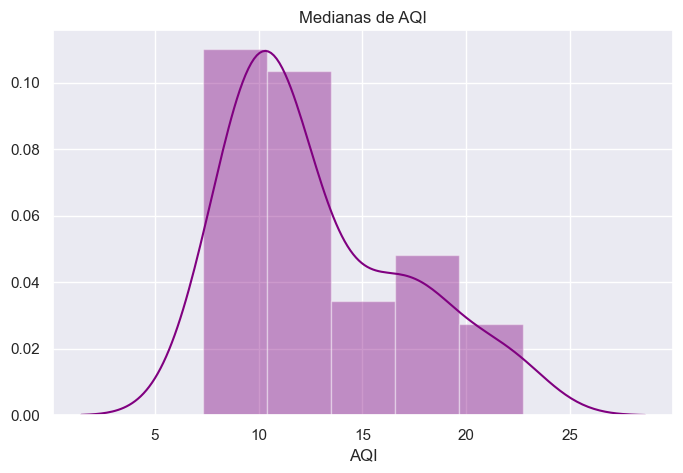

In [235]:
sns_plot = sns.distplot(df.tasa_paro, color='purple').set(title='Medianas de AQI', ylabel="", xlabel='AQI')
sns.set(rc={'figure.figsize':(8,5)})

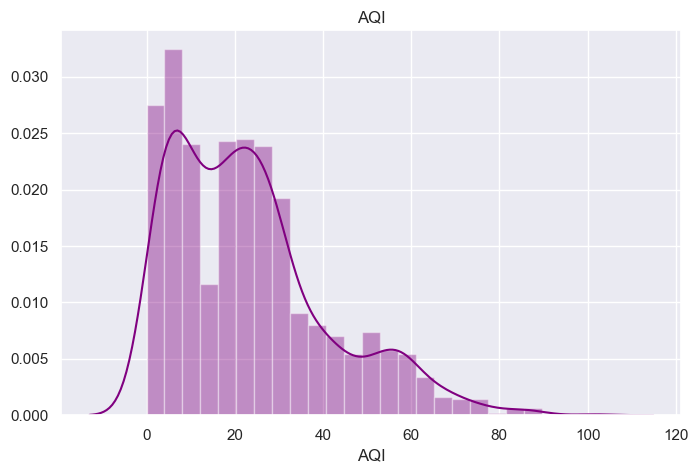

In [237]:
sns_plot = sns.distplot(df1.AQI, color='purple').set(title='AQI', ylabel="", xlabel='AQI')
sns.set(rc={'figure.figsize':(8,5)})

In [352]:
# nivel de PM 2.5 de más de 12 se considera alto
df1['high_PM2_5'] = ['yes' if n > 12 else 'no' for n in df1.PM2_5]

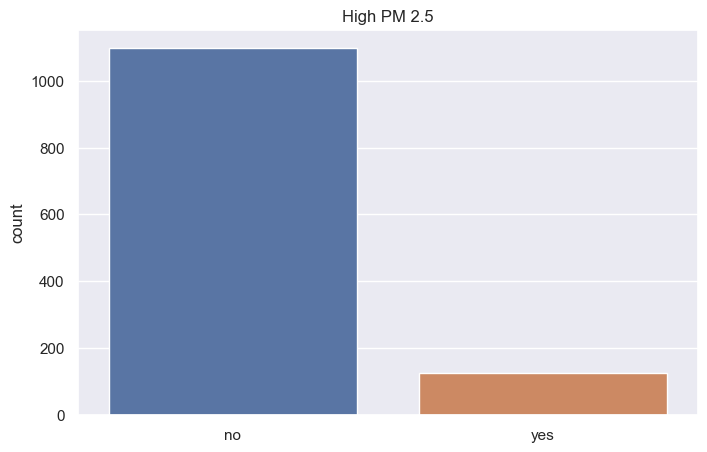

In [38]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x= 'high_PM2_5', data=df1).set(title='High PM 2.5', ylabel="count", xlabel='');

In [ ]:
# la mayoría de los datos tienen un nivel bajo de PM2.5

In [95]:
high_pms = df1[df1.PM2_5>12]['comunidades'].value_counts().reset_index().sort_values('index').rename(columns = {'index':'com', 
                                                                                                'comunidades':'count_high_PM'})
high_pms

,com,count_high_PM
0,Andalucía,22
6,Aragón,7
7,Asturias,4
14,"Balears, Illes",1
3,Canarias,18
8,Castilla y León,2
4,Castilla-La Mancha,12
1,Cataluña,21
10,Ceuta,2
13,Comunidad Valenciana,1


In [96]:
count_coms = df1['comunidades'].value_counts().reset_index().sort_values('index').rename(columns = {'index':'com', 'comunidades': 'total_count'})
count_coms

,com,total_count
10,Alicante/Alacant,26
1,Andalucía,208
4,Aragón,78
15,Asturias,26
11,"Balears, Illes",26
6,Canarias,52
9,Cantabria,26
0,Castilla y León,234
2,Castilla-La Mancha,130
3,Cataluña,104


In [97]:
high_pms = count_coms.merge(high_pms, how='left', on='com')
high_pms

,com,total_count,count_high_PM
0,Alicante/Alacant,26,NaN
1,Andalucía,208,22.0
2,Aragón,78,7.0
3,Asturias,26,4.0
4,"Balears, Illes",26,1.0
5,Canarias,52,18.0
6,Cantabria,26,NaN
7,Castilla y León,234,2.0
8,Castilla-La Mancha,130,12.0
9,Cataluña,104,21.0


In [101]:
high_pms['percent_high_PM2_5'] = (high_pms['count_high_PM'].fillna(0))/high_pms['total_count']*100
high_pms.percent_high_PM2_5 = [round(n, 2) for n in high_pms.percent_high_PM2_5] 

In [108]:
np.sum(high_pms.percent_high_PM2_5)

193.4

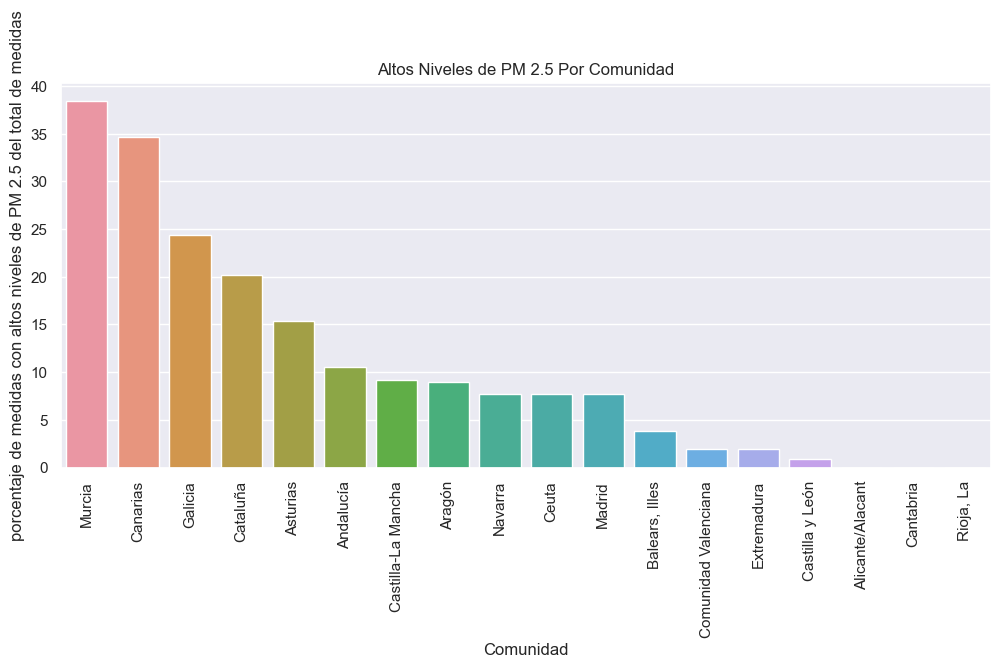

In [110]:
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=90)
sns.barplot(x= 'com', y='percent_high_PM2_5', data=high_pms.sort_values('percent_high_PM2_5', ascending=False)).set(title='Altos Niveles de PM 2.5 Por Comunidad', ylabel="porcentaje de medidas con altos niveles de PM 2.5 del total de medidas", xlabel='Comunidad');

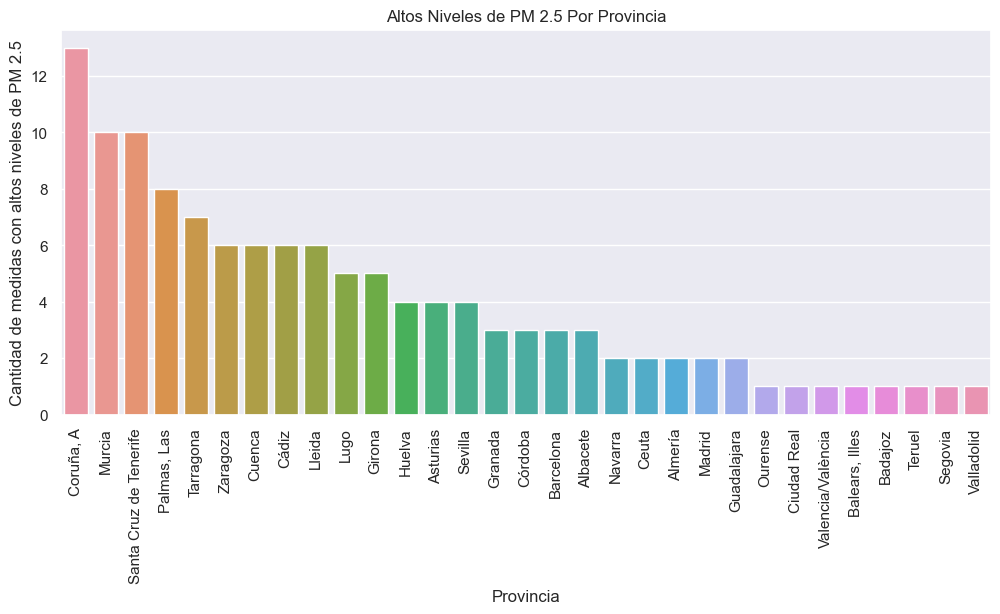

In [117]:
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=90)
sns.countplot(data=df1[df1.PM2_5>12], x='province', order = df1[df1.PM2_5>12]['province'].value_counts().index).set(title='Altos Niveles de PM 2.5 Por Provincia', ylabel="Cantidad de medidas con altos niveles de PM 2.5", xlabel='Provincia');

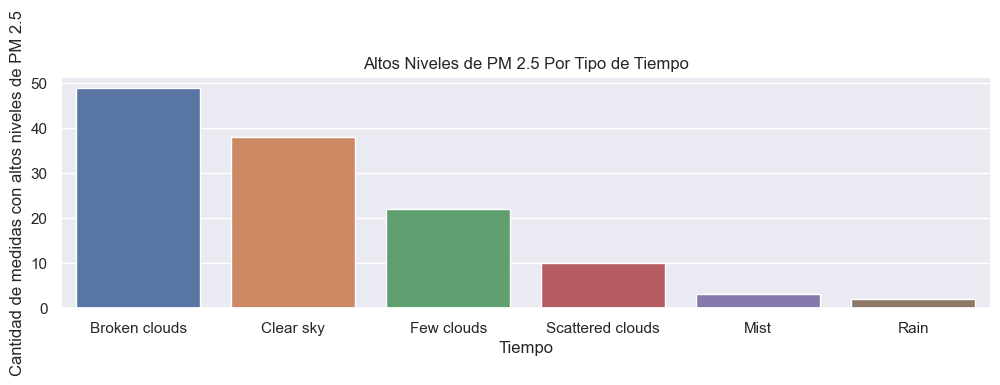

In [127]:
high_PM = df1[df1.PM2_5>12]
sns.set(rc={'figure.figsize':(12,3)})
# plt.xticks(rotation=90)
sns.countplot(x= 'weather', data=high_PM, 
              order = high_PM['weather'].value_counts().index).set(title='Altos Niveles de PM 2.5 Por Tipo de Tiempo', 
                                        ylabel="Cantidad de medidas con altos niveles de PM 2.5", 
                                        xlabel='Tiempo');

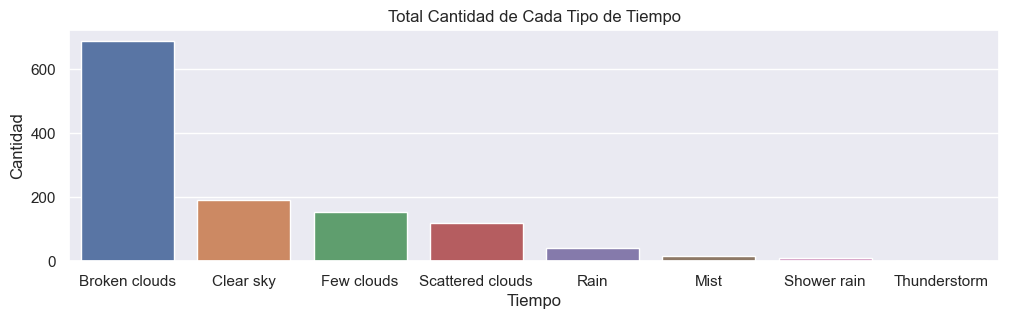

In [128]:
# visualizar total cantidad de cada tipo de tiempo para comparar con la cantidad con altos niveles de PM 2.5
sns.set(rc={'figure.figsize':(12,3)})
# plt.xticks(rotation=90)
sns.countplot(data=df1, x='weather',
              order = df1['weather'].value_counts().index).set(title='Total Cantidad de Cada Tipo de Tiempo', 
                                    ylabel="Cantidad", xlabel='Tiempo');

In [224]:
high_PM.weather.value_counts()

Broken clouds       49
Clear sky           38
Few clouds          22
Scattered clouds    10
Mist                 3
Rain                 2
Name: weather, dtype: int64

In [223]:
df1.weather.value_counts()

Broken clouds       688
Clear sky           190
Few clouds          153
Scattered clouds    121
Rain                 43
Mist                 15
Shower rain          11
Thunderstorm          1
Name: weather, dtype: int64

In [250]:
# porcentaje de data de cada tipo de tiempo en que hay PM 2.5 más alto que 12

In [261]:
round(high_PM.weather.value_counts() / df1.weather.value_counts() *100, 2).reset_index().columns = ['weather', '%']

,index,weather
0,Broken clouds,7.12
1,Clear sky,20.00
2,Few clouds,14.38
3,Mist,20.00
4,Rain,4.65
5,Scattered clouds,8.26
6,Shower rain,NaN
7,Thunderstorm,NaN


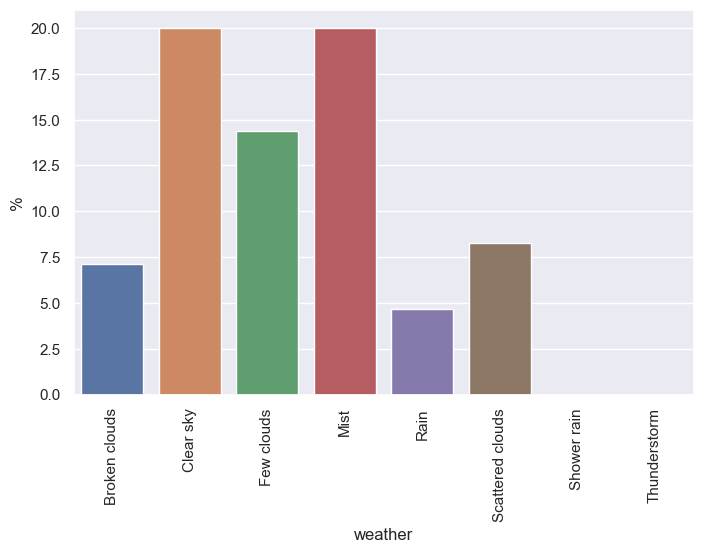

In [260]:
sns.set(rc={'figure.figsize':(8,5)})
plt.xticks(rotation=90)
sns.barplot(data=round(high_PM.weather.value_counts() / df1.weather.value_counts() *100, 2).reset_index().rename(columns={'index':'weather', 'weather':'%'}), x='weather', y='%',);

In [226]:
# medianas de PM 2.5 por tipo de tiempo
df1.groupby('weather').agg({'PM2_5':np.median}).reset_index()

,weather,PM2_5
0,Broken clouds,4.10
1,Clear sky,5.75
2,Few clouds,4.50
3,Mist,6.40
4,Rain,4.10
5,Scattered clouds,4.10
6,Shower rain,4.00
7,Thunderstorm,1.10


In [215]:
df1.sample()

,province,weather,temp_c,humidity_%,wind_km/h,pressure_mbar,AQI,PM2_5,PM10,O3,NO2,SO2,CO,PM25_was_unknown,date,comunidades,high_PM2_5
74,Málaga,Clear sky,21,62,9.5,1019,47.0,11.3,Unknown,Unknown,Unknown,Unknown,Unknown,No,2022-11-13 16:00:00,Andalucía,no


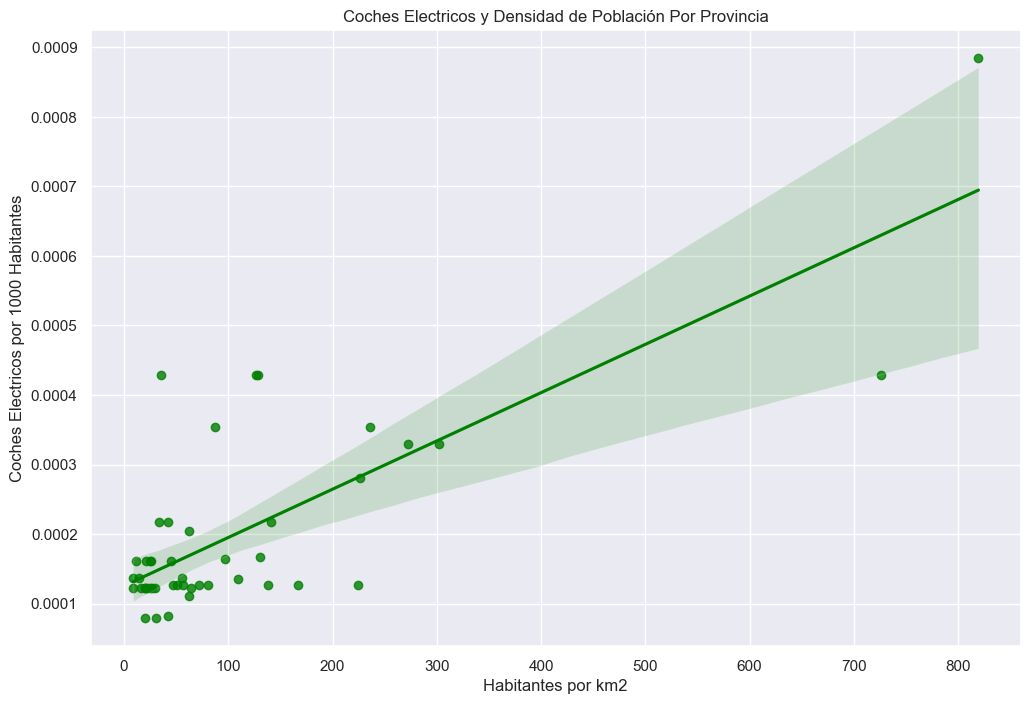

In [142]:
sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(data=df, y='ce_por_1000', x='habs_por_km2', color='green').set(title='Coches Electricos y Densidad de Población Por Provincia', xlabel='Habitantes por km2',
                                                                    ylabel='Coches Electricos por 1000 Habitantes');

In [147]:
np.corrcoef(df[df.habs_por_km2<400]['ce_por_1000'], df[df.habs_por_km2<400]['habs_por_km2'])

array([[1.        , 0.50737346],
       [0.50737346, 1.        ]])

In [244]:
np.corrcoef(df['ce_por_1000'], df['habs_por_km2'])

array([[1.        , 0.78088194],
       [0.78088194, 1.        ]])

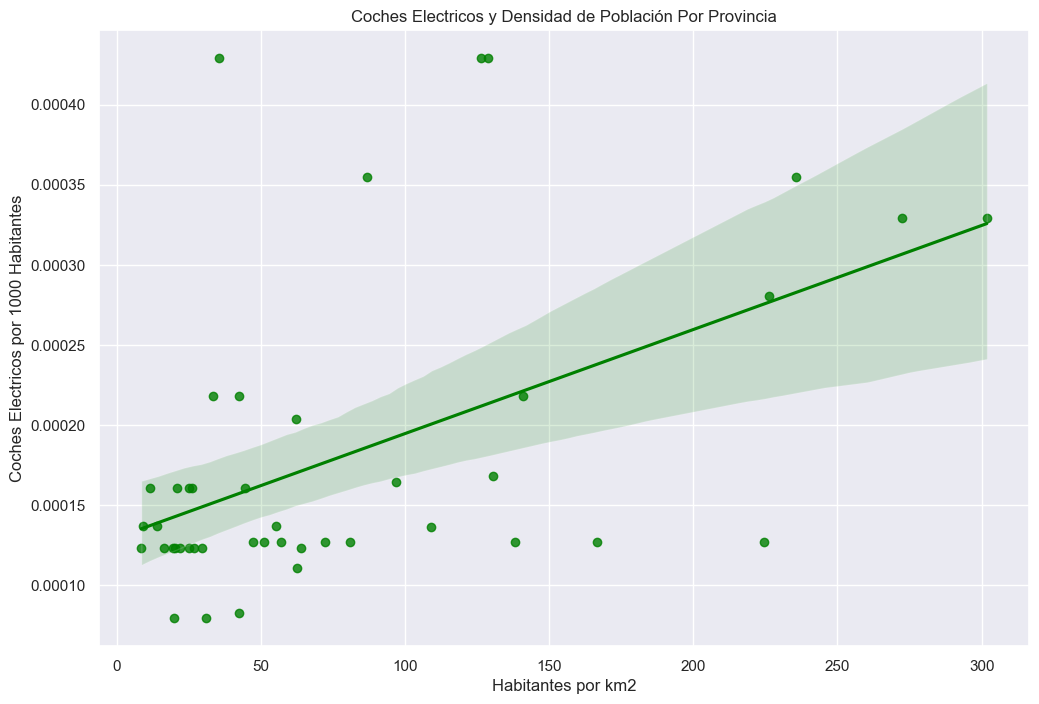

In [145]:
sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(data=df[df.habs_por_km2<400], y='ce_por_1000', x='habs_por_km2', color='green').set(title='Coches Electricos y Densidad de Población Por Provincia', xlabel='Habitantes por km2',
                                                                    ylabel='Coches Electricos por 1000 Habitantes');

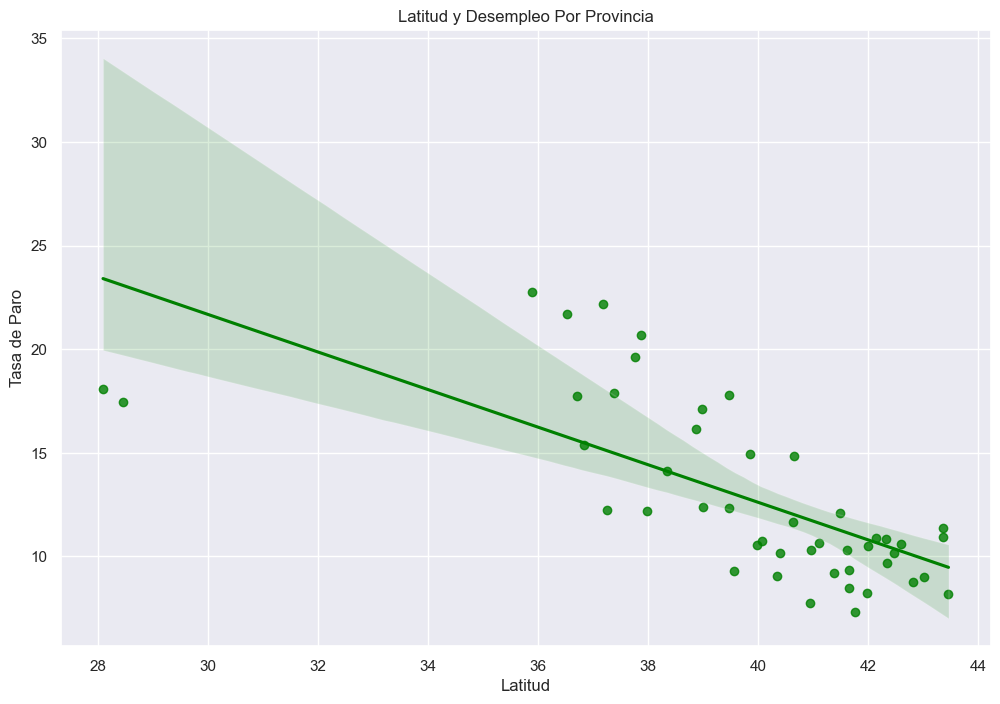

In [144]:
sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(data=df, y='tasa_paro', x='latitude', color='green').set(title='Latitud y Desempleo Por Provincia', xlabel='Latitud',
                                                                    ylabel='Tasa de Paro');

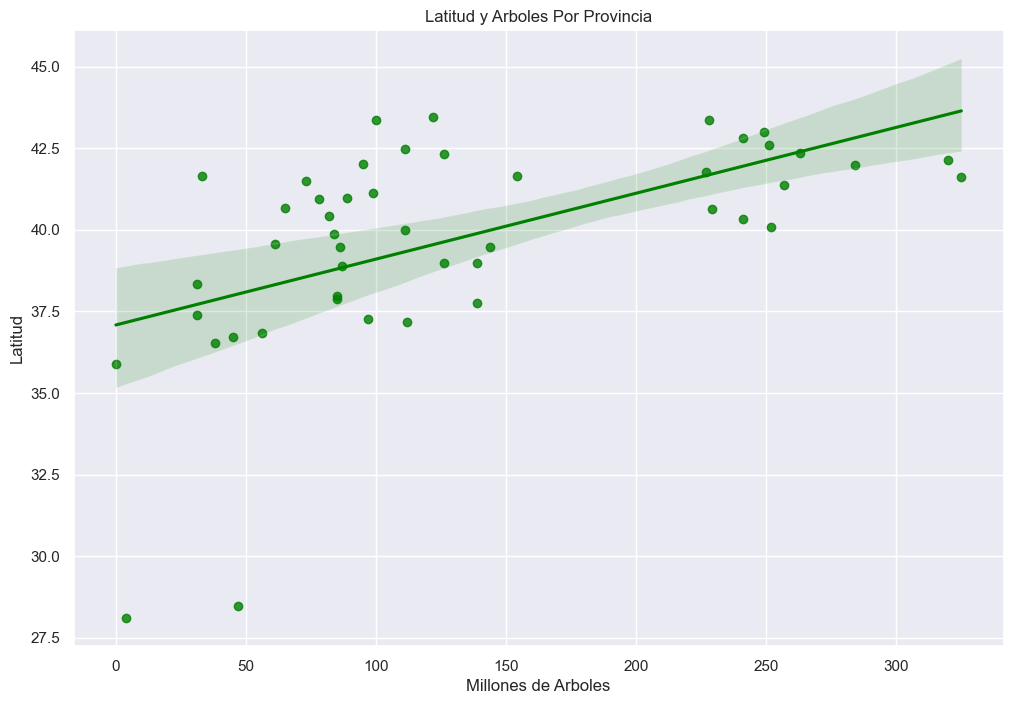

In [141]:
sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(data=df, x='trees_millions', y='latitude', color='green').set(title='Latitud y Arboles Por Provincia', xlabel='Millones de Arboles',
                                                                    ylabel='Latitud');

In [282]:
# https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health

# o3 (ozone) healthy limit: 60 μg/m3 8-hour mean

In [291]:
df1.O3

0          67.0
1          35.0
2       Unknown
3          23.0
4       Unknown
         ...   
1217        7.0
1218       17.5
1219    Unknown
1220        2.5
1221    Unknown
Name: O3, Length: 1222, dtype: object

In [261]:
# reemplazar 'Unknown' con 0 para calcular niveles altos de ozono.
temp_df = df1.copy()
temp_df['O3_n'] = temp_df.O3.replace({'Unknown': 0})
temp_df['O3_n'] = [float(n) for n in temp_df['O3_n']]

In [262]:
high_03 = temp_df[temp_df['O3_n']>60]

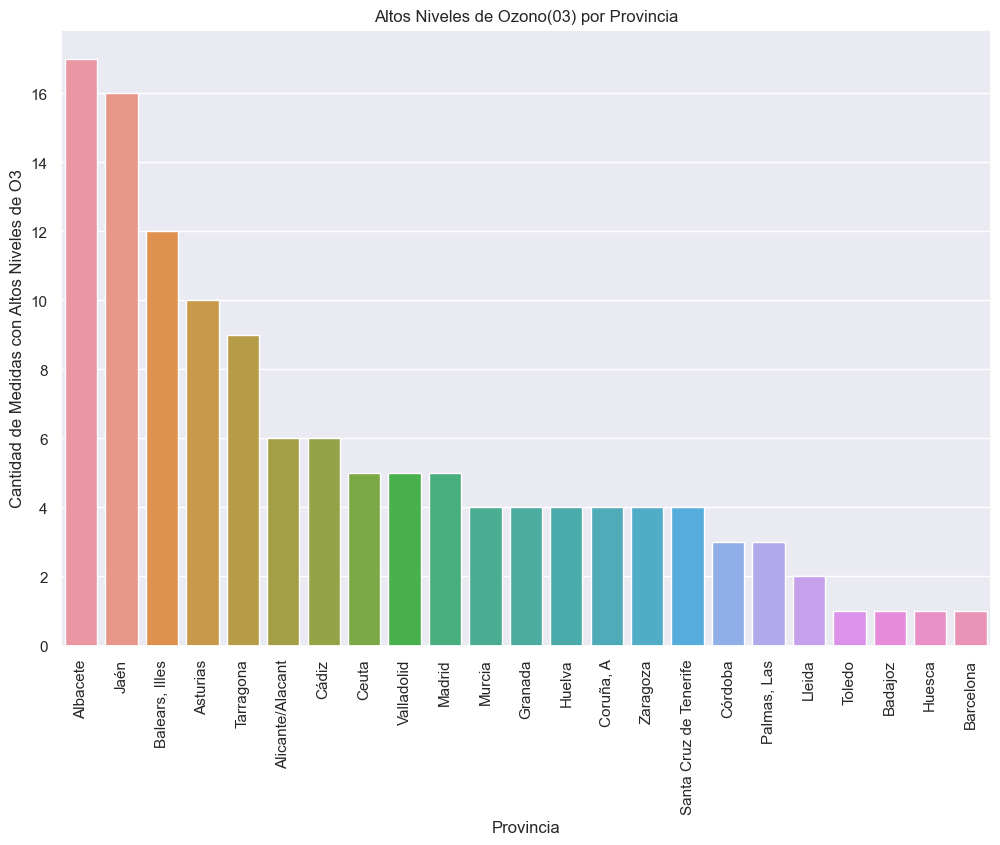

In [155]:
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(12,6)})
fig = sns.countplot(data=high_03, x='province', order = high_03['province'].value_counts().index)
fig.set(xlabel='Provincia', ylabel='Cantidad de Medidas con Altos Niveles de O3', title='Altos Niveles de Ozono(03) por Provincia');

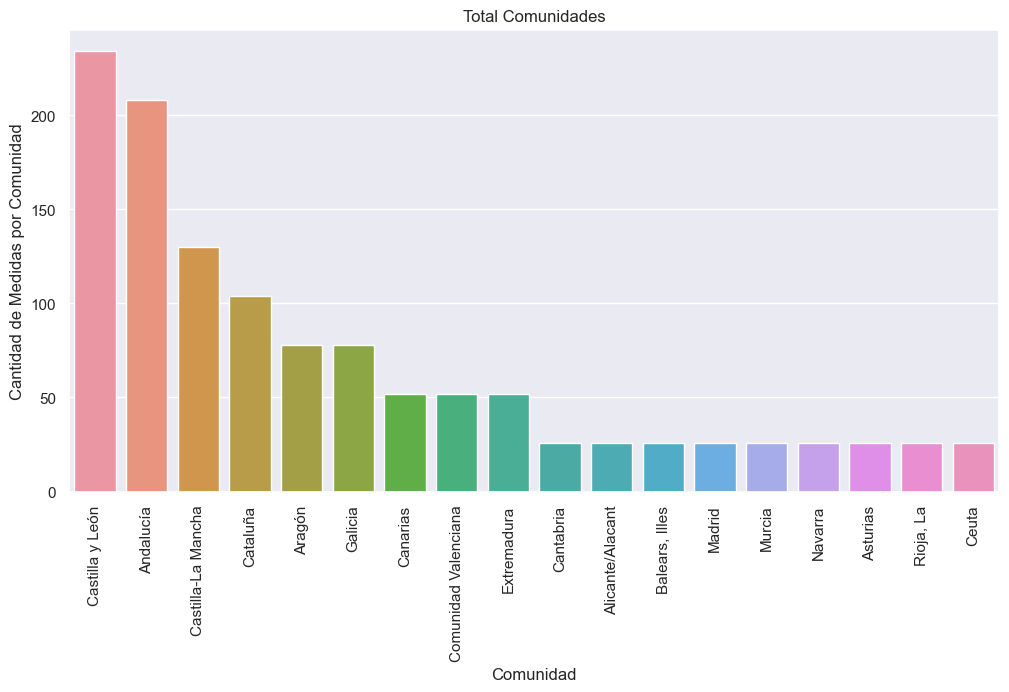

In [269]:
# visualizar la cantidad de datos en cada comunidad para comparar con los datos de alta contaminación.
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(12,6)})
fig = sns.countplot(data=df1, x='comunidades', order = df1['comunidades'].value_counts().index)
fig.set(xlabel='Comunidad', ylabel='Cantidad de Medidas por Comunidad', title='Total Comunidades');

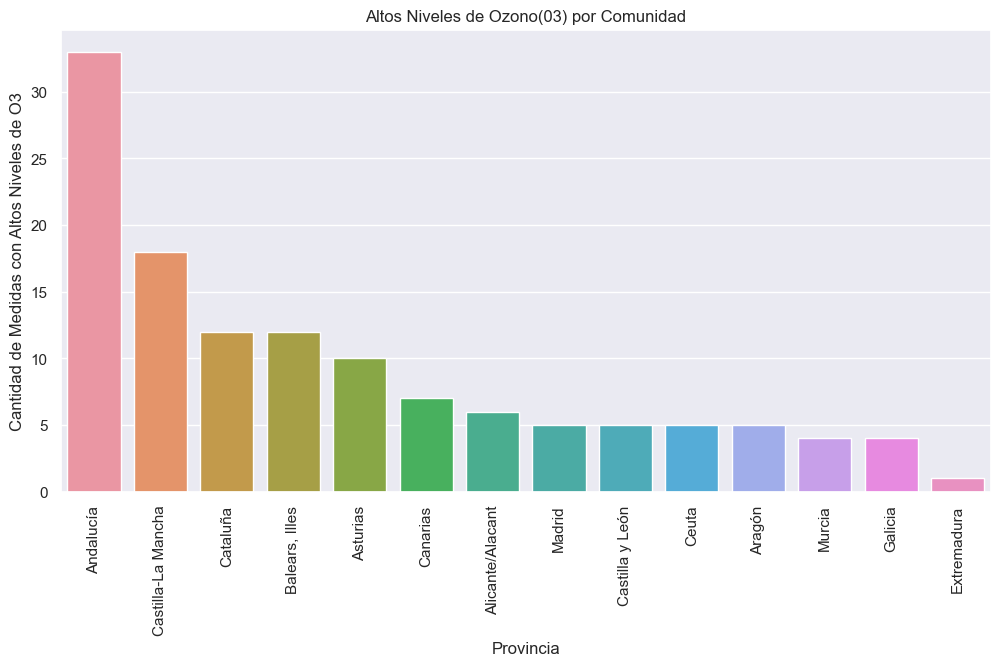

In [266]:
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(12,6)})
fig = sns.countplot(data=high_03, x='comunidades', order = high_03['comunidades'].value_counts().index)
fig.set(xlabel='Provincia', ylabel='Cantidad de Medidas con Altos Niveles de O3', title='Altos Niveles de Ozono(03) por Comunidad');

In [293]:
# agregar una columna de 'high_ozone'? para hacer más comparaciones
temp_df['high_ozone'] = ['Yes' if n > 0 else 'No' for n in temp_df['O3_n'].where(temp_df['O3_n']>60)]
temp_df

,province,weather,temp_c,humidity_%,wind_km/h,pressure_mbar,AQI,PM2_5,PM10,O3,NO2,SO2,CO,PM25_was_unknown,date,comunidades,O3_n,high_ozone
0,Albacete,Clear sky,14,88,9.3,1023,50.0,12.0,33.0,67.0,3.0,2.0,0.0,No,2022-11-13 11:00:00,Castilla-La Mancha,67.0,Yes
1,Alicante/Alacant,Few clouds,20,65,5.3,1021,17.0,4.0,5.0,35.0,2.0,3.0,0.1,No,2022-11-13 11:00:00,Alicante/Alacant,35.0,No
2,Almería,Clear sky,21,54,2.0,1020,23.0,5.5,Unknown,Unknown,Unknown,Unknown,Unknown,No,2022-11-13 11:00:00,Andalucía,0.0,No
3,Asturias,Broken clouds,17,53,10.3,1016,53.0,13.0,30.0,23.0,14.0,11.0,0.6,No,2022-11-13 11:00:00,Asturias,23.0,No
4,Ávila,Few clouds,11,70,11.6,1020,1.0,4.1,Unknown,Unknown,3.0,2.0,Unknown,No,2022-11-13 11:00:00,Castilla y León,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,Valencia/València,Few clouds,17,68,7.4,1019,19.0,4.5,6.0,7.0,20.0,3.0,0.1,No,2022-11-24 10:00:00,Comunidad Valenciana,7.0,No
1218,Valladolid,Broken clouds,9,86,14.8,1016,21.0,5.0,21.0,17.5,34.0,Unknown,Unknown,No,2022-11-24 10:00:00,Castilla y León,17.5,No
1219,Zamora,Broken clouds,10,92,19.5,1015,37.0,9.0,15.0,Unknown,Unknown,1.0,Unknown,No,2022-11-24 10:00:00,Castilla y León,0.0,No
1220,Zaragoza,Clear sky,9,87,13.0,1019,68.0,20.0,27.7,2.5,29.3,5.8,305.0,No,2022-11-24 10:00:00,Aragón,2.5,No


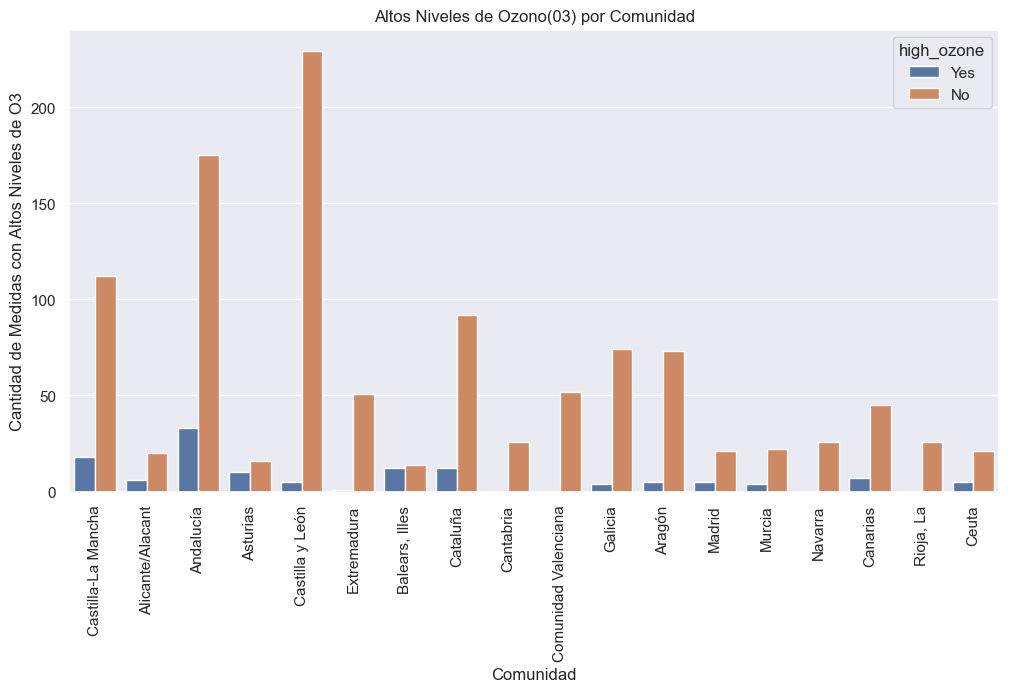

In [306]:
plt.xticks(rotation=90)
sns.countplot(data=temp_df[['comunidades', 'high_ozone']], x='comunidades', hue='high_ozone').set(xlabel='Comunidad', ylabel='Cantidad de Medidas con Altos Niveles de O3', title='Altos Niveles de Ozono(03) por Comunidad');

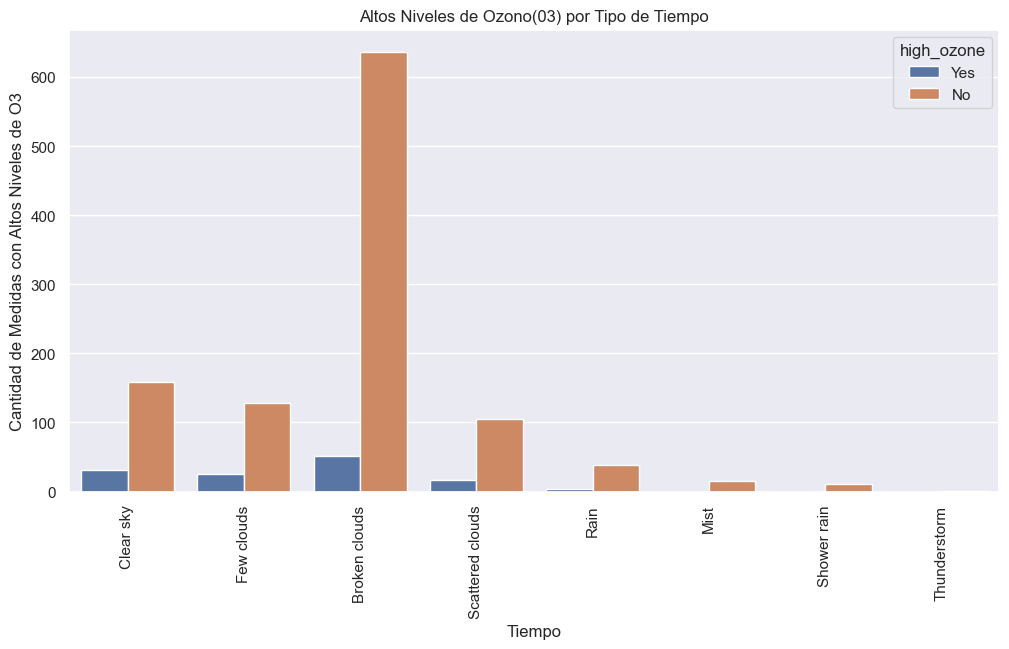

In [308]:
plt.xticks(rotation=90)
sns.countplot(data=temp_df[['weather', 'high_ozone']], x='weather', hue='high_ozone').set(xlabel='Tiempo', ylabel='Cantidad de Medidas con Altos Niveles de O3', title='Altos Niveles de Ozono(03) por Tipo de Tiempo');

In [353]:
oc = pd.read_sql(
'''
select *
from old_cars''', conn)

In [356]:
oc.sample()

,Comunidades,No_contesta,Total_vehículos,0_a_4_años,11_a_20_años,21_a_50_años,5_a_10_años
0,Andalucía,3367.2,10126.6,11698.0,7526.5,3580.1,9966.1


In [359]:
# crear diccionario para añadir una columna de poblaciones 
coms_dict=dict(zip(com_pops.community, com_pops.com_population))
coms_dict

{'Andalucía': 8384408.0,
 'Aragón': 1308728.0,
 'Asturias': 1028244.0,
 'Balears, Illes': 1128908.0,
 'Canarias': 2127685.0,
 'Cantabria': 580229.0,
 'Castilla y León': 2409164.0,
 'Castilla-La Mancha': 2026807.0,
 'Cataluña': 7600065.0,
 'Ceuta': 85144.0,
 'Comunidad Valenciana': 5011920.0,
 'Extremadura': 1072863.0,
 'Galicia': 1759971.0,
 'Madrid': 6578079.0,
 'Murcia': 1478509.0,
 'Navarra': 647554.0,
 'Rioja, La': 315675.0}

In [360]:
oc['población'] = oc.Comunidades.map(dict(zip(com_pops.community, com_pops.com_population)))

In [362]:
oc.sample()

,Comunidades,No_contesta,Total_vehículos,0_a_4_años,11_a_20_años,21_a_50_años,5_a_10_años,población
7,Castilla-La Mancha,2000.0,12691.8,14688.6,9280.9,9866.4,13596.2,2026807.0


In [369]:
oc['older_than_21_por_1000_habitante'] = oc['21_a_50_años']/oc['población']*1000

In [370]:
oc.head()

,Comunidades,No_contesta,Total_vehículos,0_a_4_años,11_a_20_años,21_a_50_años,5_a_10_años,población,older_than_21_por_1000_habitante
0,Andalucía,3367.2,10126.6,11698.0,7526.5,3580.1,9966.1,8384408.0,0.426995
1,Aragón,0.0,11213.4,13105.0,8178.5,5672.5,11201.7,1308728.0,4.334361
2,Asturias,3000.0,11238.3,12316.0,9205.1,9626.0,11431.4,1028244.0,9.361591
3,"Balears, Illes",0.0,11370.6,12150.2,8169.3,4430.5,11503.6,1128908.0,3.924589
4,Canarias,0.0,19585.7,20660.0,19433.9,17995.4,18799.2,2127685.0,8.457737


In [371]:
# crear diccionarioes para añadir columnas de coches al df
d1 = {}
for val in range(len(oc)):
    d1[oc['Comunidades'][val]] = oc['older_than_21_por_1000_habitante'][val]
d2 = {}
for val in range(len(oc)):
    d2[oc['Comunidades'][val]] = oc['Total_vehículos'][val]
d2

{'Andalucía': 10126.6,
 'Aragón': 11213.4,
 'Asturias': 11238.3,
 'Balears, Illes': 11370.6,
 'Canarias': 19585.7,
 'Cantabria': 12897.5,
 'Castilla y León': 11361.5,
 'Castilla-La Mancha': 12691.8,
 'Cataluña': 11577.8,
 'Ceuta': 24024.4,
 'Comunidad Valenciana': 12301.3,
 'Extremadura': 9991.6,
 'Galicia': 13349.7,
 'Madrid': 15699.6,
 'Murcia': 13240.2,
 'Navarra': 12678.3,
 'País Vasco': 11568.1,
 'Rioja, La': 10736.7,
 'Total Nacional': 12562.9}

In [365]:
df['car_21yrs+_por_1000_habs'] = df['community'].map(d1)

In [372]:
df['total_km_driven'] = df['community'].map(d2)
df.head()

,province,community,latitude,longitude,altitude,aqi_medians,life_exp,unemployment_rate,population,pop_density_km2,area_km2,trees_millions,tree_density,cars_100_people,electric_cars_total,electric_cars_1000_people,com_population,car_21yrs+_por_1000_habs,total_km_driven
0,"Coruña, A",Galicia,43.370126,-8.391149,21,50.5,83.15,10.92,1119351.0,140.8,7.950,100.0,12.578616,53.17,384.0,0.000218,1759971.0,5.096959,13349.7
1,Albacete,Castilla-La Mancha,38.995881,-1.855747,681,29.5,83.22,12.41,388786.0,26.0,14.926,126.0,8.441645,46.68,326.0,0.000161,2026807.0,4.867952,12691.8
2,Alicante/Alacant,Comunidad Valenciana,38.345487,-0.483183,5,19.5,82.28,14.13,1887036.0,324.4,5817.000,31.0,0.005329,51.16,1108.0,0.000355,3124884.0,2.619794,12301.3
3,Almería,Andalucía,36.838924,-2.464132,16,12.0,80.65,15.39,709340.0,80.9,8.773,56.0,6.383221,47.83,1065.0,0.000127,8384408.0,0.426995,10126.6
4,Ávila,Castilla y León,40.655870,-4.697713,1,3.0,83.53,14.86,158498.0,19.7,8.050,65.0,8.074534,52.83,296.0,0.000123,2409164.0,1.951009,11361.5


In [373]:
df.corr()

,latitude,longitude,altitude,aqi_medians,life_exp,unemployment_rate,population,pop_density_km2,area_km2,trees_millions,tree_density,cars_100_people,electric_cars_total,electric_cars_1000_people,com_population,car_21yrs+_por_1000_habs,total_km_driven
latitude,1.000000,0.541332,0.296334,-0.249711,0.530414,-0.687649,-0.081471,-0.215628,-0.064792,0.552499,0.501152,0.238395,-0.013243,-0.046404,-0.233029,-0.177985,-0.472477
longitude,0.541332,1.000000,0.039295,-0.112306,0.137052,-0.415393,0.150421,0.051402,0.133579,0.395296,0.392662,-0.077142,0.300941,0.203385,0.156533,-0.142252,-0.423010
altitude,0.296334,0.039295,1.000000,-0.281437,0.438527,-0.153132,-0.171699,-0.250320,-0.137587,0.376333,0.011726,0.107272,-0.147992,-0.158523,-0.228027,-0.095938,-0.146387
aqi_medians,-0.249711,-0.112306,-0.281437,1.000000,-0.246037,0.118306,0.105570,0.160788,-0.010182,-0.030821,0.133422,-0.092939,0.287220,0.341901,0.215191,0.102708,0.324229
life_exp,0.530414,0.137052,0.438527,-0.246037,1.000000,-0.729200,0.072553,0.074966,-0.071878,0.440452,0.411493,0.411985,0.055578,0.214271,-0.330796,-0.466483,-0.224470
unemployment_rate,-0.687649,-0.415393,-0.153132,0.118306,-0.729200,1.000000,-0.022095,-0.019407,0.046859,-0.514862,-0.598749,-0.398693,-0.080040,-0.238862,0.346830,0.276906,0.195607
population,-0.081471,0.150421,-0.171699,0.105570,0.072553,-0.022095,1.000000,0.953849,0.115491,-0.101990,0.038195,-0.184551,0.717932,0.730360,0.361413,-0.163833,0.094113
pop_density_km2,-0.215628,0.051402,-0.250320,0.160788,0.074966,-0.019407,0.953849,1.000000,0.191279,-0.165708,0.065112,-0.080096,0.704857,0.780882,0.304635,-0.096159,0.248797
area_km2,-0.064792,0.133579,-0.137587,-0.010182,-0.071878,0.046859,0.115491,0.191279,1.000000,-0.170417,-0.211063,0.034649,0.034248,0.152745,-0.022172,-0.031777,0.003724
trees_millions,0.552499,0.395296,0.376333,-0.030821,0.440452,-0.514862,-0.101990,-0.165708,-0.170417,1.000000,0.779657,0.085635,0.097751,0.061665,-0.081567,-0.191879,-0.253088


In [374]:
# no veo correlación entre la cantidad conducida en coches viejos y otros factores.

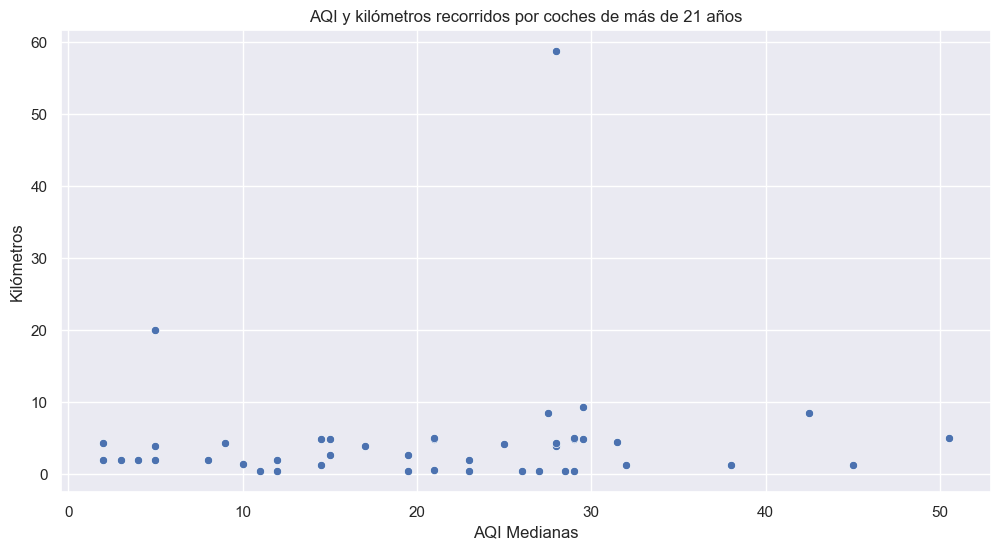

In [384]:
sns.scatterplot(data=df, x='aqi_medians', y='car_21yrs+_por_1000_habs').set(title='AQI y kilómetros recorridos por coches de más de 21 años', xlabel='AQI Medianas', ylabel='Kilómetros');

In [369]:
np.corrcoef(df.aqi_medians, df['car_21yrs+_por_1000_habs'].fillna(4))

array([[1.       , 0.1006628],
       [0.1006628, 1.       ]])

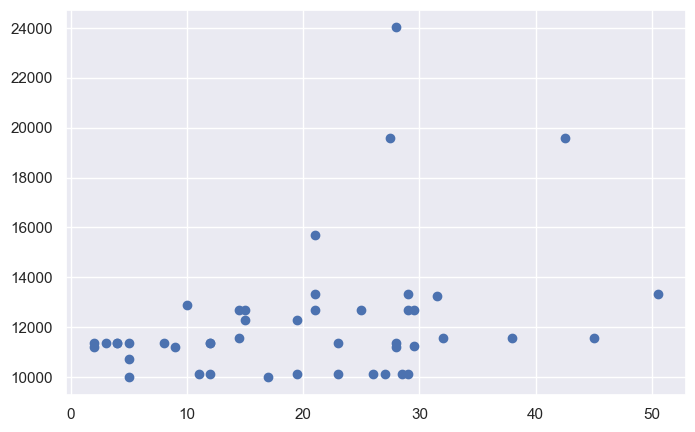

In [374]:
plt.scatter(df.aqi_medians, df['total_coches_km'])

In [376]:
np.corrcoef(df.aqi_medians, df['total_coches_km'].fillna(11000))

array([[1.        , 0.32416349],
       [0.32416349, 1.        ]])